In [55]:
import nltk
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import string
from nltk import PorterStemmer
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
stopwords = nltk.corpus.stopwords.words('english')
punctuations = string.punctuation

In [35]:
messages = pd.read_csv("spam.csv",encoding='latin-1')

In [36]:
messages = messages[["v1","v2"]]

In [37]:
messages.columns = ['label','text']

In [38]:
messages['label'] = np.where(messages['label']=='spam', 1, 0)

In [39]:
messages.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
messages['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

In [41]:
stem = PorterStemmer()

In [42]:
def clean_text(text):
    data = "".join([word.lower() for word in text if word not in punctuations])
    tokens = re.split('\W+',data)
    data = [stem.stem(word) for word in tokens if tokens not in stopwords]
    return data

In [43]:
messages['clean_text'] = messages['text'].apply(lambda x: clean_text(x))

In [44]:
messages.head()

,label,text,clean_text
0,0,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazi, avail, onli,..."
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, in, 2, a, wkli, comp, to, win, f..."
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, so, earli, hor, u, c, alreadi, t..."
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goe, to, usf, he, li..."


### Feature engineering

In [45]:
messages['lenght'] = messages['text'].apply(lambda x: len(x) - x.count(' '))

In [46]:
messages.head()

,label,text,clean_text,lenght
0,0,"Go until jurong point, crazy.. Available only ...","[go, until, jurong, point, crazi, avail, onli,...",92
1,0,Ok lar... Joking wif u oni...,"[ok, lar, joke, wif, u, oni]",24
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,"[free, entri, in, 2, a, wkli, comp, to, win, f...",128
3,0,U dun say so early hor... U c already then say...,"[u, dun, say, so, earli, hor, u, c, alreadi, t...",39
4,0,"Nah I don't think he goes to usf, he lives aro...","[nah, i, dont, think, he, goe, to, usf, he, li...",49


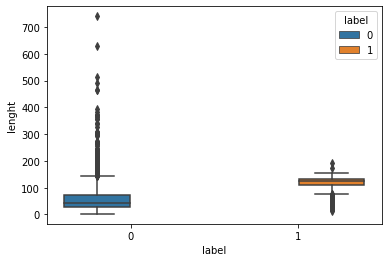

In [57]:
sns.boxplot(x=messages['label'],y=messages['lenght'],hue=messages['label'])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(messages['clean_text'],messages['label'],test_size=0.2)

In [70]:
X_train.to_csv("X_train.csv",header=True,index=False)
X_test.to_csv("X_test.csv",header=True,index=False)
y_train.to_csv("y_train.csv",header=True,index=False)
y_test.to_csv("y_test.csv",header=True,index=False)